### Import Libraries 

In [27]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

<br>

### Import Data and Create Binary Target

In [28]:
fires = pd.read_csv('Fires_At_Least_1_Acre_1_Day_2000_Later.csv')

In [41]:
fires['FIRE_SIZE_CLASS_BIN'] = np.where(fires['FIRE_SIZE']> 15, 1, 0)
fires['FIRE_SIZE_CLASS_BIN'].value_counts()

0    32027
1    29938
Name: FIRE_SIZE_CLASS_BIN, dtype: int64

<br>

### Train Test Split and Dummy Variable Creation

In [42]:
from sklearn.model_selection import train_test_split

fires_train, fires_test = train_test_split(fires, test_size=0.2, random_state=42)

In [43]:
combined_df = pd.get_dummies(fires_train, columns = ['STAT_CAUSE_DESCR', 'REGION'])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49572 entries, 16342 to 56422
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          49572 non-null  int64  
 1   OBJECTID                            49572 non-null  int64  
 2   SOURCE_SYSTEM_TYPE                  49572 non-null  object 
 3   SOURCE_SYSTEM                       49572 non-null  object 
 4   NWCG_REPORTING_AGENCY               49572 non-null  object 
 5   NWCG_REPORTING_UNIT_ID              49572 non-null  object 
 6   NWCG_REPORTING_UNIT_NAME            49572 non-null  object 
 7   SOURCE_REPORTING_UNIT               49572 non-null  object 
 8   SOURCE_REPORTING_UNIT_NAME          49572 non-null  object 
 9   FIRE_NAME                           46563 non-null  object 
 10  FIRE_YEAR                           49572 non-null  int64  
 11  DISCOVERY_DATE                      4

In [44]:
combined_df_test = pd.get_dummies(fires_test, columns = ['STAT_CAUSE_DESCR', 'REGION'])
combined_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 48565 to 1743
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          12393 non-null  int64  
 1   OBJECTID                            12393 non-null  int64  
 2   SOURCE_SYSTEM_TYPE                  12393 non-null  object 
 3   SOURCE_SYSTEM                       12393 non-null  object 
 4   NWCG_REPORTING_AGENCY               12393 non-null  object 
 5   NWCG_REPORTING_UNIT_ID              12393 non-null  object 
 6   NWCG_REPORTING_UNIT_NAME            12393 non-null  object 
 7   SOURCE_REPORTING_UNIT               12393 non-null  object 
 8   SOURCE_REPORTING_UNIT_NAME          12393 non-null  object 
 9   FIRE_NAME                           11602 non-null  object 
 10  FIRE_YEAR                           12393 non-null  int64  
 11  DISCOVERY_DATE                      12

<br>

### Logistic Regression

##### First Model - Fire Cause Only

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(combined_df[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure']])
y_train = combined_df['FIRE_SIZE_CLASS_BIN']

In [67]:
lm_1 = LogisticRegressionCV()
lm_1.fit(X_train, y_train)
lm_1.score(X_train, y_train)

0.5399015573307512

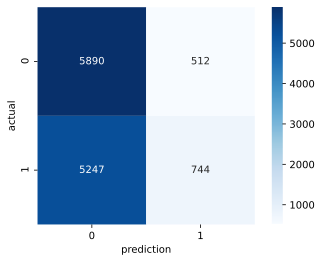

In [68]:
X_test = scaler.transform(combined_df_test[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure']])


preds = lm_1.predict(X_test)

conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [69]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.20532634193459362

In [70]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.12418627941912869

In [71]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.5923566878980892

In [ ]:
combined_df_test['proba_lrg'] = lm_1.predict_proba(combined_df_test[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure']])[:, 1]

fpr, tpr, thresholds = roc_curve(combined_df_test['FIRE_SIZE_CLASS_BIN'],
                                 combined_df_test['proba_lrg'])

def plot_roc(true, probas):
    auc = roc_auc_score(true, probas)

    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('1 - Specificity (FPR)')
    plt.ylabel('Sensitivity (TPR)');
    plt.title(f"Area Under the ROC Curve: {round(auc, 3)}");

In [ ]:
plot_roc(combined_df_test['FIRE_SIZE_CLASS_BIN'], lm_3.predict_proba(X_test)[:, 1])


<br>

##### Second Model - Region Only 

In [72]:
X_train = scaler.fit_transform(combined_df[['REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West']])
y_train = combined_df['FIRE_SIZE_CLASS_BIN']

In [73]:
lm_2 = LogisticRegressionCV()
lm_2.fit(X_train, y_train)
lm_2.score(X_train, y_train)

0.5840998951020737

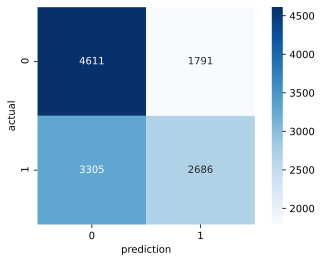

In [74]:
X_test = scaler.transform(combined_df_test[[ 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West']])


preds = lm_2.predict(X_test)

conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [75]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.5131830340084065

In [76]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.4483391754298114

In [77]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.5999553272280544

In [ ]:
combined_df_test['proba_lrg'] = lm_1.predict_proba(combined_df_test[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure']])[:, 1]

fpr, tpr, thresholds = roc_curve(combined_df_test['FIRE_SIZE_CLASS_BIN'],
                                 combined_df_test['proba_lrg'])

def plot_roc(true, probas):
    auc = roc_auc_score(true, probas)

    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('1 - Specificity (FPR)')
    plt.ylabel('Sensitivity (TPR)');
    plt.title(f"Area Under the ROC Curve: {round(auc, 3)}");

In [ ]:
plot_roc(combined_df_test['FIRE_SIZE_CLASS_BIN'], lm_3.predict_proba(X_test)[:, 1])


<br>

##### Third Model - Latitude and Longitude Only

In [79]:
X_train = scaler.fit_transform(combined_df[['LATITUDE', 'LONGITUDE']])

y_train = combined_df['FIRE_SIZE_CLASS_BIN']

In [80]:
lm_3 = LogisticRegressionCV()
lm_3.fit(X_train, y_train)
lm_3.score(X_train, y_train)

0.5249737755184378

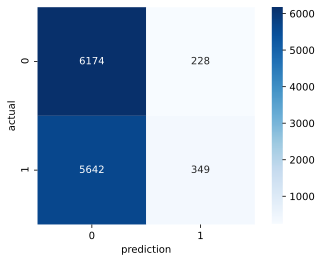

In [82]:
X_test = scaler.transform(combined_df_test[['LATITUDE', 'LONGITUDE']])


preds = lm_3.predict(X_test)

conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [83]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.10627283800243606

In [84]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.05825404773827408

In [85]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.6048526863084922

##### Fourth Model - Discovery Day of Year Only

In [87]:
X_train = scaler.fit_transform(combined_df[['DISCOVERY_DOY']])

y_train = combined_df['FIRE_SIZE_CLASS_BIN']

In [88]:
lm_4 = LogisticRegressionCV()
lm_4.fit(X_train, y_train)
lm_4.score(X_train, y_train)

0.5264867263777939

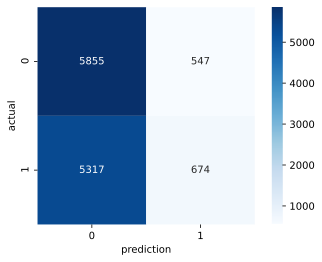

In [90]:
X_test = scaler.transform(combined_df_test[['DISCOVERY_DOY']])


preds = lm_4.predict(X_test)

conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [91]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.18691070438158627

In [92]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.11250208646302788

In [93]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.552006552006552

##### Fifth Model - Region and Fire Cause

In [94]:
X_train = scaler.fit_transform(combined_df[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West']])

y_train = combined_df['FIRE_SIZE_CLASS_BIN']

In [95]:
lm_5 = LogisticRegressionCV()
lm_5.fit(X_train, y_train)
lm_5.score(X_train, y_train)

0.5929960461550875

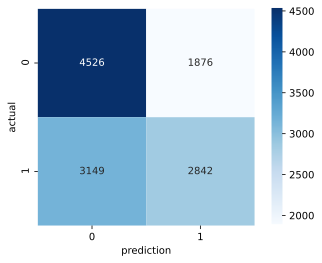

In [96]:
X_test = scaler.transform(combined_df_test[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West']])


preds = lm_5.predict(X_test)

conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [98]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.53076851246615

In [99]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.4743782340176932

In [97]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.6023738872403561

##### Sixth Model - Region, Fire Cause, and Discovery Day of Year

In [100]:
X_train = scaler.fit_transform(combined_df[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West', 'DISCOVERY_DOY']])

y_train = combined_df['FIRE_SIZE_CLASS_BIN']

In [101]:
lm_6 = LogisticRegressionCV()
lm_6.fit(X_train, y_train)
lm_6.score(X_train, y_train)

0.5931574275800855

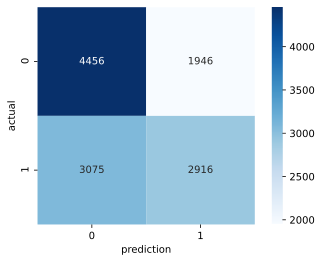

In [103]:
X_test = scaler.transform(combined_df_test[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West', 'DISCOVERY_DOY']])


preds = lm_6.predict(X_test)

conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [104]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.5373629411222703

In [105]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.4867300951427141

In [106]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.5997531879884821

<br>

### KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

X_train = combined_df[['REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West', 'STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'DISCOVERY_DATE',
                      'LATITUDE', 'LONGITUDE']]

y_train = combined_df['FIRE_SIZE_CLASS_BIN']


knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='recall')
print(scores)

[0.5874739  0.59916493 0.57661795 0.60835073 0.57703549 0.59373695
 0.59164927 0.59189641 0.59732665 0.59314954]


In [64]:
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='recall')
print(scores)

[0.50438413 0.51524008 0.50647182 0.51189979 0.4914405  0.51022965
 0.51189979 0.50918964 0.51879699 0.51587302]


<br>

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

In [54]:
X_train = combined_df[['REGION_Alaska', 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West', 'STAT_CAUSE_DESCR_Campfire', 
                     'STAT_CAUSE_DESCR_Arson', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
                      'LATITUDE', 'LONGITUDE']]

y_train = combined_df['FIRE_SIZE_CLASS_BIN']


In [55]:
randomforest = RandomForestClassifier(n_estimators=1000)
quick_test_afew_times(randomforest, X_train, y_train)

0.6574098977945132

In [56]:
X_test = (combined_df_test[['REGION_Alaska', 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West', 'STAT_CAUSE_DESCR_Campfire',
                     'STAT_CAUSE_DESCR_Arson', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
                      'LATITUDE', 'LONGITUDE']])


preds = randomforest.predict(X_test)

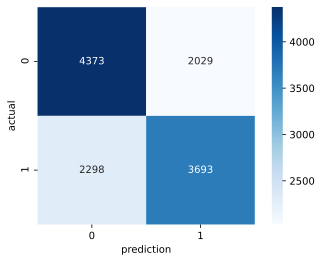

In [57]:
conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [58]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.6305814052761889

In [59]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.6164246369554331

In [60]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.6454037049982524

<br>

### XGBoost

In [109]:
import xgboost as xgb